# European option pricing

In [1]:
# Import packages 
import pandas as pd 
import numpy as np
import scipy.stats as si
from matplotlib import pyplot as plt

In [18]:
#Center cell ouput
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## 1. Binomial pricing

*First we will start with the binomial pricing :
We will modelize the evolution of the spot price. The distribution of this latter is related to **Binomial** distribution, and each step are i.i.d (independant and identicaly distributed).  
The spot price at each period n is a log-binomial random variable.  
We assume no arbitrage.*
 

In [2]:
def Binomial(r,sigma,div,T,n,S,K,otype):
    # We calculate the time step size
    dt=T/n
    
    # We apply the u and d formulation
    u=round(np.exp((r-div)*dt+(sigma*np.sqrt(dt))),5)
    d=round(np.exp((r-div)*dt-(sigma*np.sqrt(dt))),5)
     
    # Then, we calculate the risk-neutral probability
    p=(np.exp((r-div)*dt) -d)/(u-d)
    
    # We create matrix to store value
    Stree=np.zeros((n+1, n+1))
    Intrinsic=np.zeros((n+1, n+1))
    Option=np.zeros((n+1, n+1))

    #For each path
    for j in range(0,n+1):
    #For each time step
        for i in range(0,j+1):
            Stree[i,j] = S*(u**(j-i))*(d**(i))
            if otype=="call":
                Intrinsic[i,j]=np.maximum(Stree[i,j]-K,0)
            elif otype=="put":
                Intrinsic[i,j]=np.maximum(K-Stree[i,j],0)
            else:
                print('Error opt type, please write "call" or "put"')

    for j in range(n,-1,-1):
        for i in range(0, j+1):
            if j==n:
                Option[i,j] = Intrinsic[i,j]
            else:
                Option[i,j] = np.exp(-r*dt)*(Option[i,j+1]*p\
                + Option[i+1,j+1]*(1-p))

    results =[Option [0,0]]
    #print(f"The European {otype} option price is", round(Option [0,0],4),f"for strike = {K}")
    #print(f"u={round(u,4)} and d={round(d,4)}")
    #print(f"p={round(p,4)}")
    return results, otype, K       

In [3]:
Binomial(0.04,0.2,0,5,12,100,120,"call")

([18.246877456843105], 'call', 120)

## 2. Black & Scholes

### 2.1 Option pricing

*Assumptions :  
-Volatility remains constant  
-Interest Rate and dividends are constant  
-The underlying price (S) follows a lognormal distribution because the tails needs to be above zero.  
-No transactions costs
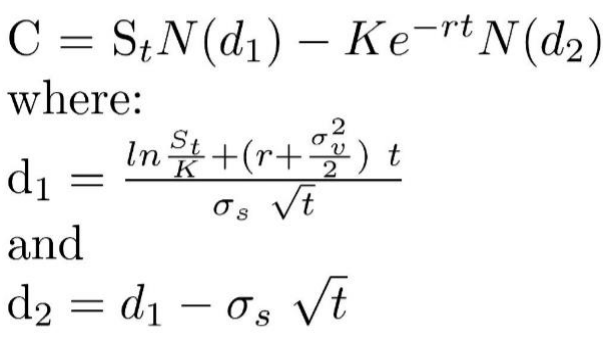
Where C = call option price, S= current stock price, K =strike price,t= time to maturity, N a normal distribution,   
σ = volatility rate (standard deviation of the returns)*

In [65]:
def BS(S,K,T,r,sigma,otype):
    
    # We start by computinh d1 and d2 : 
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T)\
    / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T)\
    / (sigma * np.sqrt(T))
    
    # Then we apply the formula depending on the option type
    if otype == "call":
        result = (S * si.norm.cdf(d1, 0.0, 1.0)- K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    elif otype == "put":
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)- S * si.norm.cdf(-d1, 0.0, 1.0))
    else :
        print('Error, please enter "call" or "put"')
    print(f"{otype} price : {round(result,4)} for K={K}")
    return result, d1, d2, otype

In [62]:
BS(100,120,5,0.04,0.2,"call")

call price : 18.4283 for K=120


(18.42827768133197, 0.2631369984950659, -0.18407659700489215)

### 2.2 Option greeks

In [ ]:
# Get the BS results and compute the greeks : 
def greeks(S,K,T,r,sigma,otype) : 
    BS_result, d1, d2, otype = BS(S,K,T,r,sigma,otype)
    if otype = "call" : 
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif otype = "put" : 
        delta = -si.norm.cdf(-d1, 0.0, 1.0)

## 3. Compare Binomial and BS results

*We can observe a difference between our results found in the binomial model and the BS model. In fact, the binomial model is discrete when BS model is continuous. We can observe the convergence between thoses two by adding more steps in the binomial.*

In [59]:
def compare(S,K,r,sigma,T,div,otype,Upper_N) :
   
    # We create lists to store N and the differents prices
    N_list=[]
    list_def = []
    start = int((T/2)+1)
    for i in range(start,Upper_N+1) : 
        N_list.append(i)

    # We compute for each number of steps n the price corresponding
    for n in N_list :
        temp = Binomial(r,sigma,div,T,n,S,K,otype)
        list_def.append(temp[0])
    
    # We plot our results :
    plt.plot(N_list,list_def,label="Binomial tree results")
    plt.title(f"BS vs Binomial results for {Upper_N} steps")
    plt.xlabel("N")
    plt.ylabel("Call price")
    plt.axhline(y=BS_result, color='r', linestyle='--',label="BS result") # We already get the BS_result varaible 
    plt.legend()
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()
    return None

BS results :
call price : 18.4283 for K=120
Delta :0.0041


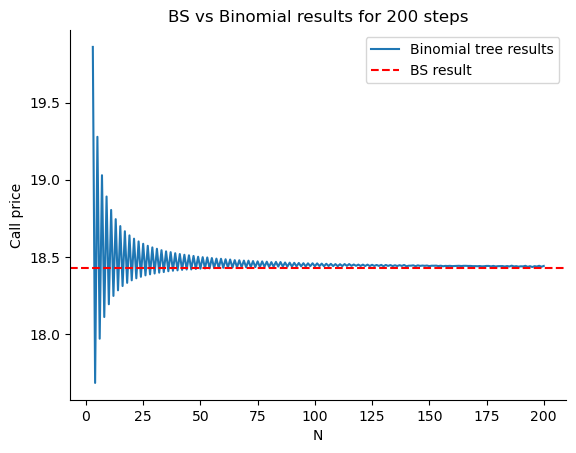

In [60]:
compare(100,120,0.04,0.2,5,0,"call",200)